# Chicago Public School Data Analysis and Data Visualization for High Schools
## A Descriptive and Correlational Research Study
### Analyzing the relationship of certain attributes with school performance
In this code, we will be doing a data analysis on Chicago Public Schools to provide insight to the attributes that are most indicative or correlated with how a student is likely to perform in school. It will be focused on data visualizations with a statistical approach to interpretations.

Table of Contents:
- 1) Data Collection 
- 2) Exploratory Data Analysis and Missing Values Imputation
- 3) Data Preprocessing
- 4) Statistic Analysis and Data Visualization

#### Data Collection
We can download the public dataset from Kaggle.com at https://www.kaggle.com/chicago/chicago-public-schools-data?select=chicago-public-schools-high-school-progress-report-2013-2014.csv

At this time, the data has elementary and high school progress reports from 2013-2014. We will be focusing on just the high school data. However, we will utilize machine learning workflow pipeline practices to allow for scalability into other datasets such as the elementary CPS data. 

In [1]:
import pandas as pd

# Import data from csv file
df = pd.read_csv('chicago-public-schools-high-school-progress-report-2013-2014.csv')
print(f'This is the dateframe shape: {df.shape}')
print('These are the columns:')
print(df.columns)
print(df.head(5))

This is the dateframe shape: (188, 103)
These are the columns:
Index(['School ID', 'Name of School', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'Website', 'Blue Ribbon Award',
       'CPS Performance Policy Level',
       ...
       'Y Coordinate', 'Longitude', 'Latitude', 'Location',
       'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes',
       'Census Tracts', 'Wards', 'Historical Wards 2003-2015'],
      dtype='object', length=103)
   School ID                                    Name of School  \
0     610572                   Camelot Safe Academy Elementary   
1     400133           YCCS-Innovations of Arts Integration HS   
2     400148  Instituto Justice and Leadership Acad Charter HS   
3     609761                      George H Corliss High School   
4     609716                           Kelvyn Park High School   

            Street Address     City State  ZIP Code     Phone Number  \
0           125 S Clark St  Chicago    IL     60603  (7

#### Exploratory Data Analysis and Preprocessing

There are 188 rows or data observations and a staggering 103 columns or features/attributes. 

We will:
1) drop duplicate values
2) check with columns that have null values and drop those
3) trim the columns/attributes with what we believe, within reason, that should have no correlation with school performance (a priori knowledge)

In [2]:
# Drop duplicates
df = df.drop_duplicates()
print(f'Number of rows after dropping dupes: {df.shape}')

# Check which columns have null values
null_cols = len(df.columns[df.isna().any()])
print(f'Number of columns with null values: {null_cols}')

Number of rows after dropping dupes: (188, 103)
Number of columns with null values: 82


The number of columns with null values are larger than expected. We have several options for missing values. 

We could either:
- Take the average for that column and fill the missing values in (imputation)
- Remove the data point/row with the missing value from the dataset
- Predict the value with regression or k-NN

This usually depends on how many missing values we have for that particular column so we will use a mixed approach. 

We will first select the columns that have a certain amount of its data missing and remove those columns.

Then we will remove columns with a priori assumptions of its correlation.

<function matplotlib.pyplot.show(close=None, block=None)>

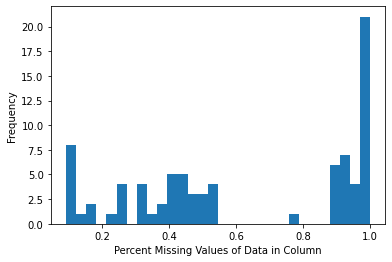

In [3]:
import matplotlib.pyplot as plt

# Show all rows
#pd.set_option("display.max_rows", None)

# Percentage of null values per column with nulls
null_list = df.columns[df.isna().any()] # Pull out all columns with nulls
null_list = df[null_list.to_numpy()].isna().sum()/df.shape[0]

# Using a histogram to see the distribution of missing values
null_hist = plt.hist(null_list, bins=30)
plt.xlabel('Percent Missing Values of Data in Column')
plt.ylabel('Frequency')
plt.show

We can see that of columns that have missing values, the largest portion of them are missing all of their values (the 1.0 bin).

Using this distribution of missing values, we will drop columns that are missing 50% or more of their values to retain columns that may still work well after we impute the missing values.

In [4]:
# Remove columns with too many missing values
threshold = 0.5
nan_list = df.columns[df.isna().sum() >= (threshold * df.shape[0])]
print(nan_list)

Index(['Blue Ribbon Award', 'Probation Length',
       'NWEA Reading Growth Percentile All Grades',
       'NWEA Reading Growth Percentile Grade 3',
       'NWEA Reading Growth Percentile Grade 4',
       'NWEA Reading Growth Percentile Grade 5',
       'NWEA Reading Growth Percentile Grade 6',
       'NWEA Reading Growth Percentile Grade 7',
       'NWEA Reading Growth Percentile Grade 8', 'NWEA Math Growth All Grades',
       'NWEA Math Growth Grade 3', 'NWEA Math Growth Grade 4',
       'NWEA Math Growth Grade 5', 'NWEA Math Growth Grade 6',
       'NWEA Math Growth Grade 7', 'NWEA Math Growth Grade 8',
       'NWEA Reading Attainment Percentile All Grades',
       'NWEA Reading Attainment Percentile Grade 2',
       'NWEA Reading Attainment Percentile Grade 3',
       'NWEA Reading Attainment Percentile Grade 4',
       'NWEA Reading Attainment Percentile Grade 5',
       'NWEA Reading Attainment Percentile Grade 6',
       'NWEA Reading Attainment Percentile Grade 7',
       'NWEA

In [5]:
# Remove columns
df = df.drop(columns=nan_list.to_numpy())

# Print and show the remaining columns
df.columns

Index(['School ID', 'Name of School', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'Website', 'CPS Performance Policy Level',
       'CPS Performance Policy Status', 'My Voice, My School Overall Rating',
       'Student Response Rate', 'Teacher Response Rate', 'Involved Family',
       'Supportive Environment', 'Ambitious Instruction', 'Effective Leaders',
       'Collaborative Teachers', 'Safe', 'School Community',
       'Parent-Teacher Partnership', 'Quality of Facilities',
       'Healthy Schools Certification', 'Creative Schools Certification',
       'EPAS Growth Percentile', 'EXPLORE Growth Percentile Grade 9',
       'Plan Growth Percentile Grade 10', 'ACT Growth Percentile Grade 11',
       'EPAS Attainment Percentile', 'EXPLORE Attainment Percentile Grade 9',
       'PLAN Attainment Percentile Grade 10',
       'Grade ACT Attainment Percentile Grade 11',
       'EXPLORE Spring 2013 Average Grade 9',
       'EXPLORE Spring 2013 Average Grade 10',
     

Now we will analyze these columns to see whether we should remove that data point/row, impute the values in the columns, or remove the column with a priori assumptions of its correlation.

In [6]:
# Check missing values
df.isna().sum() / df.shape[0]

School ID                                                 0.000000
Name of School                                            0.000000
Street Address                                            0.000000
City                                                      0.000000
State                                                     0.000000
ZIP Code                                                  0.000000
Phone Number                                              0.090426
Website                                                   0.000000
CPS Performance Policy Level                              0.250000
CPS Performance Policy Status                             0.250000
My Voice, My School Overall Rating                        0.000000
Student Response Rate                                     0.101064
Teacher Response Rate                                     0.101064
Involved Family                                           0.000000
Supportive Environment                                    0.00

#### Dropping some columns/attributes via the Data Scientist's discretion
The list also shows a number of columns where the same data was collected for two years in a row, columns such as "Student Attendance Percentage 2012" and "Student Attendance Percentage 2013". It could have been potentially insightful if we could identify a trend over a longer period of time than two years but since we only have two years, two data points in time is not enough samples to reject any null hypothesis concerning trends over time. 

Although we could analyze the two years to identify if any differences are statistically significatn, we can not make any inferences regarding growth or decline. For our analysis, we will avoid observations concerning time, choosing instead to focus our analysis on a snapshot of the schools for a particular year. Therefore, for our purposes, we will drop the earlier 2012 data along with the attributes we feel a priori have no correlation, like "Website".

In [7]:
# We assume the following columns will not show any significant correlation with the school's performance
apriori_list = [
    'School ID',
    'Name of School',
    'Street Address',
    'City', 
    'State', 
    'Phone Number',
    'Website',
    'EXPLORE Fall 2011 Average Grade 9',
    'PLAN Fall 2012 Average Grade 10',
    '4-Year Graduation Rate Percentage 2012',
    '5-Year Graduation Rate Percentage 2012',
    'College Enrollment Rate Percentage 2012',
    'College Persistence Rate Percentage 2012',
    'Suspensions Per 100 2012',
    'Student Attendance Percentage 2012',
    'Teacher Attendance Percentage 2012',
    'One-Year DropOut Rate Percentage 2012',
    'X Coordinate', # We will use the latitude and longitude instead
    'Y Coordinate',
    'Location' # From the five rows in the beginning of the notebook, we see this is just a dictionary of latitude and longitudes. We could keep either/or
]

# Remove columns
df = df.drop(columns=apriori_list)

# Print and show the remaining columns
df.columns

Index(['ZIP Code', 'CPS Performance Policy Level',
       'CPS Performance Policy Status', 'My Voice, My School Overall Rating',
       'Student Response Rate', 'Teacher Response Rate', 'Involved Family',
       'Supportive Environment', 'Ambitious Instruction', 'Effective Leaders',
       'Collaborative Teachers', 'Safe', 'School Community',
       'Parent-Teacher Partnership', 'Quality of Facilities',
       'Healthy Schools Certification', 'Creative Schools Certification',
       'EPAS Growth Percentile', 'EXPLORE Growth Percentile Grade 9',
       'Plan Growth Percentile Grade 10', 'ACT Growth Percentile Grade 11',
       'EPAS Attainment Percentile', 'EXPLORE Attainment Percentile Grade 9',
       'PLAN Attainment Percentile Grade 10',
       'Grade ACT Attainment Percentile Grade 11',
       'EXPLORE Spring 2013 Average Grade 9',
       'EXPLORE Spring 2013 Average Grade 10',
       'ACT Spring 2013 Average Grade 11',
       '4-Year Graduation Rate Percentage 2013',
       '5-Yea

Sometimes there may be discrepancies in the data collection where missing values are explicitly entered as "Incomplete" or "No Data", rather than left as a null value. 

We continue our exploratory data analysis on the categorical columns and the numerical columns to determine if that is the case. If so, we can trim our columns further before making any meaningful statistical analysis.

In [8]:
# Check column data types to isolate string columns
df.dtypes

ZIP Code                                                    int64
CPS Performance Policy Level                               object
CPS Performance Policy Status                              object
My Voice, My School Overall Rating                         object
Student Response Rate                                     float64
Teacher Response Rate                                     float64
Involved Family                                            object
Supportive Environment                                     object
Ambitious Instruction                                      object
Effective Leaders                                          object
Collaborative Teachers                                     object
Safe                                                       object
School Community                                           object
Parent-Teacher Partnership                                 object
Quality of Facilities                                      object
Healthy Sc

In [20]:
# Isolate interval/ratio type of measurements from nominal/ordinal measurements
#num_cols = df.select_dtypes(include = ['float64', 'int64'])
str_cols = df.select_dtypes(include = 'object')

# Peek inside the string columns
print(str_cols.head(10))

# Explore the separate data types
print(str_cols.describe())

  CPS Performance Policy Level CPS Performance Policy Status  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                      LEVEL 3                  ON PROBATION   
4                      LEVEL 3                  ON PROBATION   
5                      LEVEL 2                NOT APPLICABLE   
6                      LEVEL 2              NOT ON PROBATION   
7                      LEVEL 3                  ON PROBATION   
8                      LEVEL 2              NOT ON PROBATION   
9                      LEVEL 2              NOT ON PROBATION   

  My Voice, My School Overall Rating  Involved Family Supportive Environment  \
0                    NOT ENOUGH DATA  NOT ENOUGH DATA        NOT ENOUGH DATA   
1                     WELL-ORGANIZED          NEUTRAL                 STRONG   
2                     WELL-ORGANIZED             WEAK  

The head shows that our categorical columns actually use "NOT ENOUGH DATA" and "INCOMPLETE DATA" as an indicator for misisng values. We'll check the frequency of these categories and whether they meet our threshold for misisng data to decide if we should keep the column for our statistical analysis.

In [37]:
# Frequency of missing data strings
for column in str_cols.columns:
    NED_count = len(df[df[column].str.contains('NOT ENOUGH DATA',na=True)])
    ID_count = len(df[df[column].str.contains('INCOMPLETE DATA',na=True)])
    proportion = int((NED_count + ID_count) * 100 / df.shape[0])
    print(f'{column} has {proportion}% missing data.')

CPS Performance Policy Level has 57% missing data.
CPS Performance Policy Status has 50% missing data.
My Voice, My School Overall Rating has 15% missing data.
Involved Family has 21% missing data.
Supportive Environment has 23% missing data.
Ambitious Instruction has 23% missing data.
Effective Leaders has 21% missing data.
Collaborative Teachers has 21% missing data.
Safe has 23% missing data.
School Community has 80% missing data.
Parent-Teacher Partnership has 80% missing data.
Quality of Facilities has 80% missing data.
Healthy Schools Certification has 0% missing data.
Creative Schools Certification has 62% missing data.


We will remove the columns greater than our threshold. 

Another column that we could remove is the "Healthy Schools Certification" due to the very high frequency of "NOT CERTIFIED" at 172/188, or 91%, to focus on the other columns instead.

In [18]:
# Drop more missing data columns 
df.drop(columns = [
    'CPS Performance Policy Level',
    'CPS Performance Policy Status',
    'School Community',
    'Parent-Teacher Partnership',
    'Quality of Facilities',
    'Healthy Schools Certification',
    'Creative Schools Certification'
])

,ZIP Code,CPS Performance Policy Level,CPS Performance Policy Status,"My Voice, My School Overall Rating",Student Response Rate,Teacher Response Rate,Involved Family,Supportive Environment,Ambitious Instruction,Effective Leaders,...,College Enrollment Rate Percentage 2013,College Persistence Rate Percentage 2013,Suspensions Per 100 2013,Percentage of Misconducts Resulting in Suspension 2013,Average Length of Suspensions 2013,Student Attendance Percentage 2013,Teacher Attendance Percentage 2013,One-Year DropOut Rate Percentage 2013,Longitude,Latitude
0,60603,NaN,NaN,NOT ENOUGH DATA,NaN,NaN,NOT ENOUGH DATA,NOT ENOUGH DATA,NOT ENOUGH DATA,NOT ENOUGH DATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.879989,-87.630689
1,60609,NaN,NaN,WELL-ORGANIZED,50.5,100.0,NEUTRAL,STRONG,STRONG,NEUTRAL,...,NaN,NaN,NaN,NaN,NaN,74.7,NaN,40.2,41.811873,-87.631977
2,60608,NaN,NaN,WELL-ORGANIZED,56.0,55.6,WEAK,STRONG,STRONG,STRONG,...,NaN,NaN,NaN,NaN,NaN,82.9,NaN,27.6,41.845477,-87.684065
3,60628,LEVEL 3,ON PROBATION,MODERATELY ORGANIZED,83.1,90.2,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,...,38.7,45.6,88.7,78.5,2.6,78.1,94.7,2.1,41.707391,-87.603078
4,60639,LEVEL 3,ON PROBATION,NOT YET ORGANIZED,66.7,82.1,WEAK,WEAK,WEAK,VERY WEAK,...,40.0,47.5,82.7,51.8,1.6,78.1,94.1,8.0,41.927891,-87.736002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,60623,LEVEL 2,NOT ON PROBATION,PARTIALLY ORGANIZED,98.3,100.0,NEUTRAL,WEAK,NEUTRAL,NEUTRAL,...,38.1,50.0,39.2,27.6,3.1,83.9,94.2,1.6,41.848579,-87.708670
184,60653,LEVEL 1,ON PROBATION,MODERATELY ORGANIZED,67.4,96.8,WEAK,NEUTRAL,STRONG,NEUTRAL,...,53.6,50.0,145.8,58.6,3.0,77.0,94.8,0.5,41.823908,-87.619788
185,60617,LEVEL 2,NOT ON PROBATION,PARTIALLY ORGANIZED,80.3,87.6,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,...,42.0,64.5,68.3,96.3,1.9,85.2,95.6,6.4,41.688109,-87.537550
186,60649,NaN,NaN,NOT ENOUGH DATA,NaN,NaN,NOT ENOUGH DATA,NOT ENOUGH DATA,NOT ENOUGH DATA,NOT ENOUGH DATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.766830,-87.585794
